In [1]:
import requests
from bs4 import BeautifulSoup
import json

In [2]:
import time

In [3]:
# Wall time
# Record the start time (wall time)
start_time_wall = time.time()
end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.6f} seconds")


# CPU time
# Record the start time (total execution time)
start_time_cpu = time.process_time()
end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.6f} seconds")


Elapsed Wall Time: 0.000055 seconds
Elapsed CPU Time: 0.000104 seconds


# 1. Scraping

## 1.1 starting code wall and CPU time

In [4]:
start_time_wall = time.time()
start_time_cpu = time.process_time()

urls = [
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/short-term-international-student-FAQ.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/Emergencyinformation.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/curricular-practical-training/cpt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/optional-practical-training/opt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/alumni/extend-your-opt/stem-opt/FAQs-on-the-new-regulations-for-STEM-OPT.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/tax/tax-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/visa-and-academic-changes/effect-of-arrest-on-immigration-status.html"
]

faqs = []

for url in urls:
    response = requests.get(url)

    soup = BeautifulSoup(response.text, 'html.parser')

    blocks = soup.find_all('details', class_= 'expandable singleton')
    for b in blocks:
        question = b.find('summary', class_='expandable-item-title').text.strip()
        answers_paragraphs = b.find_all('p')
        answer_text = ''
        for p in answers_paragraphs:
            for a in p.find_all('a'):
                if 'href' in a.attrs:
                    link_text = a.text
                    link_url = a['href']
                    markdown_link = f"[{link_text}](https://www.nyu.edu{link_url})" if not link_url.startswith('http') else f"[{link_text}]({link_url})"
                    a.replace_with(markdown_link)
            text_with_markdown_links = ''.join([str(x) for x in p.contents]).replace('<br/>', '\n').strip()
            answer_text += text_with_markdown_links + ' '

        # print(f"question: {question}")
        # print(f"answer: {answer_text}")
        faqs.append({'question': question, 'answer': answer_text})

faqs_json = json.dumps(faqs, indent=4)

with open('faqs.json', 'w') as file:
    file.write(faqs_json)


end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.4f} seconds")

end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.4f} seconds")

Elapsed Wall Time: 3.1024 seconds
Elapsed CPU Time: 1.0402 seconds


## 1.2 starting code line_profiler

In [7]:
%load_ext line_profiler

In [8]:
from line_profiler import LineProfiler

urls = [
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/short-term-international-student-FAQ.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/Emergencyinformation.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/curricular-practical-training/cpt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/optional-practical-training/opt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/alumni/extend-your-opt/stem-opt/FAQs-on-the-new-regulations-for-STEM-OPT.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/tax/tax-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/visa-and-academic-changes/effect-of-arrest-on-immigration-status.html"
]

faqs = []


def process_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    blocks = soup.find_all('details', class_='expandable singleton')
    for b in blocks:
        question = b.find('summary', class_='expandable-item-title').text.strip()
        answers_paragraphs = b.find_all('p')
        answer_text = ''
        for p in answers_paragraphs:
            for a in p.find_all('a'):
                if 'href' in a.attrs:
                    link_text = a.text
                    link_url = a['href']
                    markdown_link = f"[{link_text}](https://www.nyu.edu{link_url})" if not link_url.startswith('http') else f"[{link_text}]({link_url})"
                    a.replace_with(markdown_link)
            text_with_markdown_links = ''.join([str(x) for x in p.contents]).replace('<br/>', '\n').strip()
            answer_text += text_with_markdown_links + ' '

        faqs.append({'question': question, 'answer': answer_text})

profiler = LineProfiler()
profiler.add_function(process_url)

# Profile the execution of each URL
for url in urls:
    profiler.runcall(process_url, url)

profiler.print_stats()

Timer unit: 1e-09 s

Total time: 1.87117 s
File: <ipython-input-8-8278a5356969>
Function: process_url at line 17

Line #      Hits         Time  Per Hit   % Time  Line Contents
    17                                           def process_url(url):
    18         8 1844512478.0    2e+08     98.6      response = requests.get(url)
    19         8   23958631.0    3e+06      1.3      soup = BeautifulSoup(response.text, 'html.parser')
    20                                               
    21         8    2688986.0 336123.2      0.1      blocks = soup.find_all('details', class_='expandable singleton')
    22         8      11581.0   1447.6      0.0      for b in blocks:
    23                                                   question = b.find('summary', class_='expandable-item-title').text.strip()
    24                                                   answers_paragraphs = b.find_all('p')
    25                                                   answer_text = ''
    26                   

## 1.3 multi processing

In [9]:
from multiprocessing import Pool, cpu_count

In [10]:
cpu_count()

2

In [11]:
%%writefile mp.py


import requests
from bs4 import BeautifulSoup
import json


def scrape_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    faq_items = []
    blocks = soup.find_all('details', class_='expandable singleton')
    for block in blocks:
        question = block.find('summary', class_='expandable-item-title').text.strip()
        answer_paragraphs = block.find_all('p')
        answer_text = ''
        for paragraph in answer_paragraphs:
            for link in paragraph.find_all('a'):
                if 'href' in link.attrs:
                    link_text = link.text
                    link_url = link['href']
                    markdown_link = f"[{link_text}](https://www.nyu.edu{link_url})" if not link_url.startswith('http') else f"[{link_text}]({link_url})"
                    link.replace_with(markdown_link)
            text_with_markdown_links = ''.join(str(content) for content in paragraph.contents).replace('<br/>', '\n').strip()
            answer_text += text_with_markdown_links + ' '
        faq_items.append({'question': question, 'answer': answer_text})

    return faq_items

Writing mp.py


In [12]:
import mp

start_time_wall = time.time()
start_time_cpu = time.process_time()


urls = [
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/short-term-international-student-FAQ.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/Emergencyinformation.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/curricular-practical-training/cpt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/optional-practical-training/opt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/alumni/extend-your-opt/stem-opt/FAQs-on-the-new-regulations-for-STEM-OPT.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/tax/tax-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/visa-and-academic-changes/effect-of-arrest-on-immigration-status.html"
]

if __name__ == "__main__":
    # Create a Pool of worker processes
    #pool = Pool()
    num_processes = cpu_count()  # Use all available CPU cores
    pool = Pool(processes=num_processes)

    # Use multiprocessing to scrape URLs in parallel
    results = pool.map(mp.scrape_url, urls)

    # Flatten the list of results
    faqs = [item for sublist in results for item in sublist]

    # Convert FAQs to JSON format
    faqs_json = json.dumps(faqs, indent=4)

    # Write FAQs to a JSON file
    with open('faqs.json', 'w') as file:
        file.write(faqs_json)

    # Close the pool of worker processes
    pool.close()
    pool.join()

    end_time_wall = time.time()
    elapsed_wall_time = end_time_wall - start_time_wall
    print(f"Elapsed Wall Time: {elapsed_wall_time:.6f} seconds")

    end_time_cpu = time.process_time()
    elapsed_cpu_time = end_time_cpu - start_time_cpu
    print(f"Elapsed CPU Time: {elapsed_cpu_time:.6f} seconds")

Elapsed Wall Time: 0.634061 seconds
Elapsed CPU Time: 0.047191 seconds


## 1.4 multi threading

In [13]:
import threading

start_time_wall = time.time()
start_time_cpu = time.process_time()

urls = [
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/short-term-international-student-FAQ.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/Emergencyinformation.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/curricular-practical-training/cpt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/optional-practical-training/opt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/alumni/extend-your-opt/stem-opt/FAQs-on-the-new-regulations-for-STEM-OPT.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/tax/tax-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/visa-and-academic-changes/effect-of-arrest-on-immigration-status.html"
]

faqs = []

def process_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    blocks = soup.find_all('details', class_='expandable singleton')
    for b in blocks:
        question = b.find('summary', class_='expandable-item-title').text.strip()
        answers_paragraphs = b.find_all('p')
        answer_text = ''
        for p in answers_paragraphs:
            for a in p.find_all('a'):
                if 'href' in a.attrs:
                    link_text = a.text
                    link_url = a['href']
                    markdown_link = f"[{link_text}](https://www.nyu.edu{link_url})" if not link_url.startswith('http') else f"[{link_text}]({link_url})"
                    a.replace_with(markdown_link)
            text_with_markdown_links = ''.join([str(x) for x in p.contents]).replace('<br/>', '\n').strip()
            answer_text += text_with_markdown_links + ' '

        # Append the FAQ to the list (thread-safe operation)
        faqs.append({'question': question, 'answer': answer_text})

# Create thread objects for each URL
threads = []
for url in urls:
    thread = threading.Thread(target=process_url, args=(url,))
    threads.append(thread)
    thread.start()

# Wait for all threads to complete
for thread in threads:
    thread.join()

# Serialize FAQs to JSON
faqs_json = json.dumps(faqs, indent=4)

# Write FAQs to a file
with open('faqs.json', 'w') as file:
    file.write(faqs_json)

# Calculate and print elapsed time
end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.6f} seconds")

end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.6f} seconds")


Elapsed Wall Time: 0.735337 seconds
Elapsed CPU Time: 0.880053 seconds


# 2. statistics of word counting

In [14]:
# Load JSON data from faqs.json
with open('faqs.json', 'r') as file:
    faqs = json.load(file)

In [16]:
import re
from line_profiler import LineProfiler

## 2.1 starting code

In [17]:
def extract_sentences(text):
    # Use regex to split text into sentences
    sentences = re.split(r'[.!?]', text)
    # Filter out empty sentences
    sentences = [s.strip() for s in sentences if s.strip()]
    return sentences
def word_count(sentence):
    # Split sentence into words and count them
    words = sentence.split()
    return len(words)

start_time_wall = time.time()
start_time_cpu = time.process_time()

# Iterate over each FAQ item and extract sentences
sentences = []

for faq in faqs:
    question_sentences = extract_sentences(faq['question'])
    answer_sentences = extract_sentences(faq['answer'])
    sentences.extend(question_sentences)
    sentences.extend(answer_sentences)
# Calculate word count for each sentence
sentence_word_counts = [(sentence, word_count(sentence)) for sentence in sentences]

end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.6f} seconds")
end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.6f} seconds")

Elapsed Wall Time: 0.011163 seconds
Elapsed CPU Time: 0.010124 seconds


In [18]:
# Print or process the word counts
for sentence, count in sentence_word_counts:
    print(f"Sentence: '{sentence}'")
    print(f"Word Count: {count}")
    print("---")

Sentence: 'What is an I-20/DS-2019'
Word Count: 4
---
Sentence: 'The [I-20 (for F-1 students)/DS-2019 (for J-1 students)](https://www'
Word Count: 8
---
Sentence: 'nyu'
Word Count: 1
---
Sentence: 'edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/before-you-arrive/get-a-us-visa/apply-for-an-i20-or-ds2019'
Word Count: 1
---
Sentence: 'html) is the document you need from NYU in order to apply for the F-1 or J-1 student visa at a consulate outside the US'
Word Count: 25
---
Sentence: 'You also need to present your I-20 or DS-2019 at the US border along with your F-1 or J-1 visa (except for Canadian citizens), and other supporting documents in order to be able to enter the US as an F-1 or J-1 student'
Word Count: 43
---
Sentence: 'When should I apply for the I-20/DS-2019'
Word Count: 7
---
Sentence: 'Submit your application at least 3-4  months prior to your intended start date in case of visa delays'
Word Count: 18
---
Sentence: 'If you don’t appl

## 2.2 concurrent execution

In [19]:
import os
os.cpu_count() # number of worker threads

2

In [20]:
import concurrent.futures

start_time_wall = time.time()
start_time_cpu = time.process_time()

# Function to process FAQ item and extract sentences
def process_faq(faq):
    question_sentences = extract_sentences(faq['question'])
    answer_sentences = extract_sentences(faq['answer'])
    return question_sentences + answer_sentences

# Use ThreadPoolExecutor for parallel processing
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Submit tasks for each FAQ item and collect results
    all_sentences = executor.map(process_faq, faqs)

# Flatten the list of sentences
sentences = [sentence for sublist in all_sentences for sentence in sublist]

# Calculate word count for each sentence in parallel
with concurrent.futures.ThreadPoolExecutor() as executor:
    sentence_word_counts = list(executor.map(word_count, sentences))

end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.6f} seconds")

end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.6f} seconds")

Elapsed Wall Time: 0.046543 seconds
Elapsed CPU Time: 0.045327 seconds


## 2.3 JIT and Numba

In [21]:
import numba as nb

start_time_wall = time.time()
start_time_cpu = time.process_time()

@nb.jit
def word_count(sentence):
    # Split sentence into words and count them
    words = sentence.split()
    return len(words)

# Iterate over each FAQ item and extract sentences
sentences = []

for faq in faqs:
    question_sentences = extract_sentences(faq['question'])
    answer_sentences = extract_sentences(faq['answer'])
    sentences.extend(question_sentences)
    sentences.extend(answer_sentences)

# Calculate word count for each sentence
sentence_word_counts = [(sentence, word_count(sentence)) for sentence in sentences]

end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.6f} seconds")

end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.6f} seconds")

<ipython-input-21-77d093421b03>:7: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def word_count(sentence):


Elapsed Wall Time: 5.091442 seconds
Elapsed CPU Time: 4.528597 seconds


## 2.4 Plotting the distribution graph

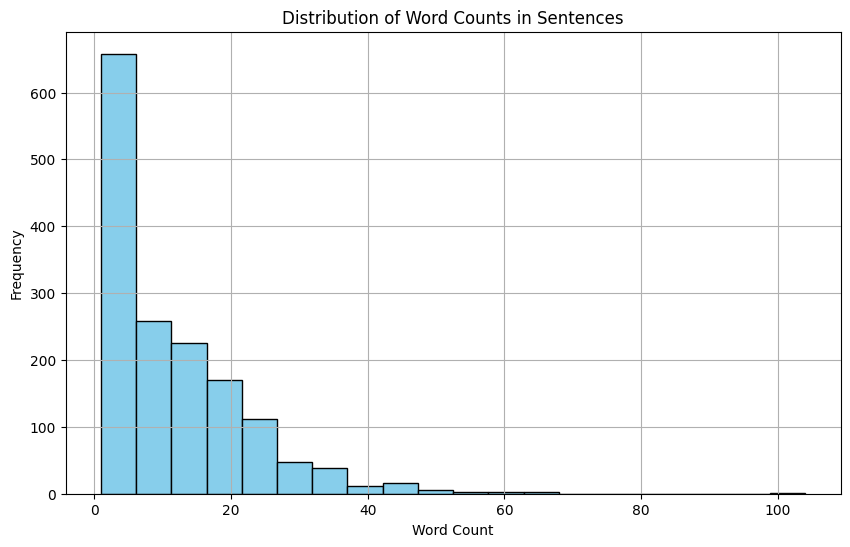

In [27]:
import matplotlib.pyplot as plt

word_counts_arr = [tup[1] for tup in sentence_word_counts]

plt.figure(figsize=(10, 6))
plt.hist(word_counts_arr, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts in Sentences')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()